<a href="https://colab.research.google.com/github/nelsonchchang/Machine_learning/blob/main/lsp_5_machine_learning_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Tutorial

- References
    - 張鈞閔, [Hands-On Tutorial of Machine Learning in Python](https://github.com/twcmchang/hands-on-ML/blob/master/Hands-on%20Tutorial%20of%20Machine%20Learning%20in%20Python.pdf), 中央研究院資訊科學所, 2017.9.19
    - 機器學習發展歷史回顧：https://kknews.cc/tech/n389r88.html
    - Vikram Kamath, [Introduction to Machine Learning](https://in.pycon.org/2011/static/files/talks/11/Introduction_To_ML_Partial_2.pdf), 2011
    - Pedro Domingos, [A Few Useful Things to Know about Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf), University of Washington
    - 林軒田, [Machine Learning Foundations](https://www.youtube.com/playlist?list=PLXVfgk9fNX2I7tB6oIINGBmW50rrmFTqf) (online course on youtube)
    - 李宏毅, [Machine Learning](https://www.youtube.com/playlist?list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49) and [Next Step of Machine Learning](https://www.youtube.com/playlist?list=PLJV_el3uVTsOK_ZK5L0Iv_EQoL1JefRL4) (online course on youtube)
    - 陳縕儂，[Applied Deep Learning](https://www.csie.ntu.edu.tw/~miulab/s108-adl/syllabus), 2019

## Regression
* Polynomial Regression
* LASSO regression
* Ridge regression
* Logistic regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
      'figure.figsize': (12, 6),
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'x-large',
      'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)

%matplotlib inline

### Example 1: Polynomial Regression

In [3]:
np.random.seed(100)

x = np.array([i * np.pi / 180 for i in range(60, 300, 4)])
y = np.sin(x) + np.random.normal(0, 0.15, len(x))
data = pd.DataFrame(np.column_stack([x, y]), columns = ['x', 'y'])

<Axes: xlabel='x', ylabel='y'>

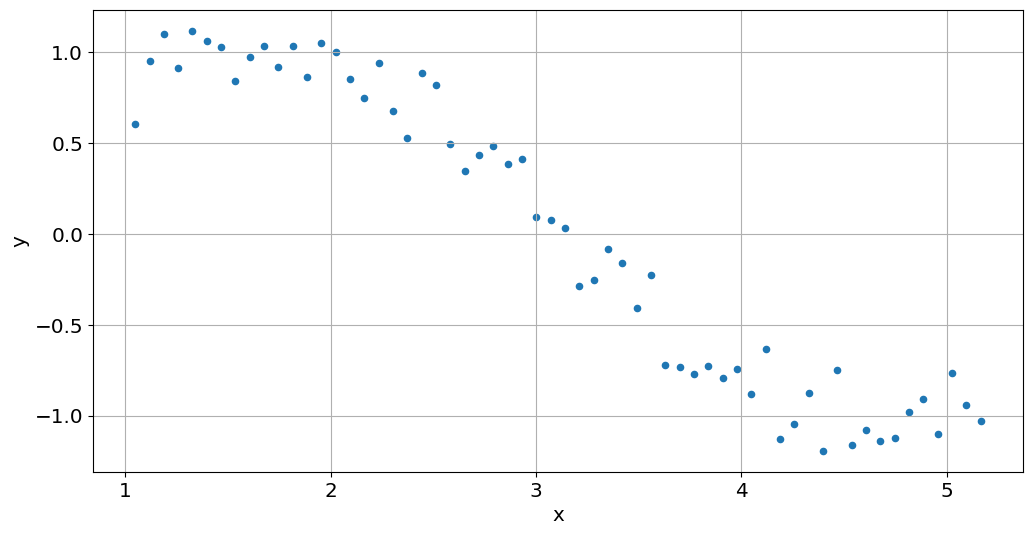

In [4]:
data.plot.scatter(x = "x", y = "y", grid = True)

In [5]:
for i in range(2, 16):
    data["x^{}".format(i)] = data['x'] ** i
data.head()

,x,y,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,x^11,x^12,x^13,x^14,x^15
0,1.047198,0.603561,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,0.950196,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,1.100139,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.913191,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.117494,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


In [10]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

def example_regression(data, power, plot_dict, reg_type, alpha = 0):

    type_dict = {"Linear" : LinearRegression(),
            "Lasso" : Lasso(alpha = alpha),
            "Ridge" : Ridge(alpha = alpha)}

    basis_functions = ["x"]
    if power >= 2:
        basis_functions.extend(["x^{}".format(i) for i in range(2, power + 1)])

    if reg_type in type_dict:
        model = type_dict[reg_type]

    model.fit(data[basis_functions], data["y"])
    y_pred = model.predict(data[basis_functions])

    if power in plot_dict:
        plt.subplot(plot_dict[power])
        plt.tight_layout()
        plt.plot(data["x"], data["y"], '.')
        plt.plot(data["x"], y_pred)
        plt.title('Power: {}'.format(power))

    rss = sum((y_pred - data["y"]) ** 2)
    ret = [rss]
    ret.extend([model.intercept_])
    ret.extend(model.coef_)
    return ret

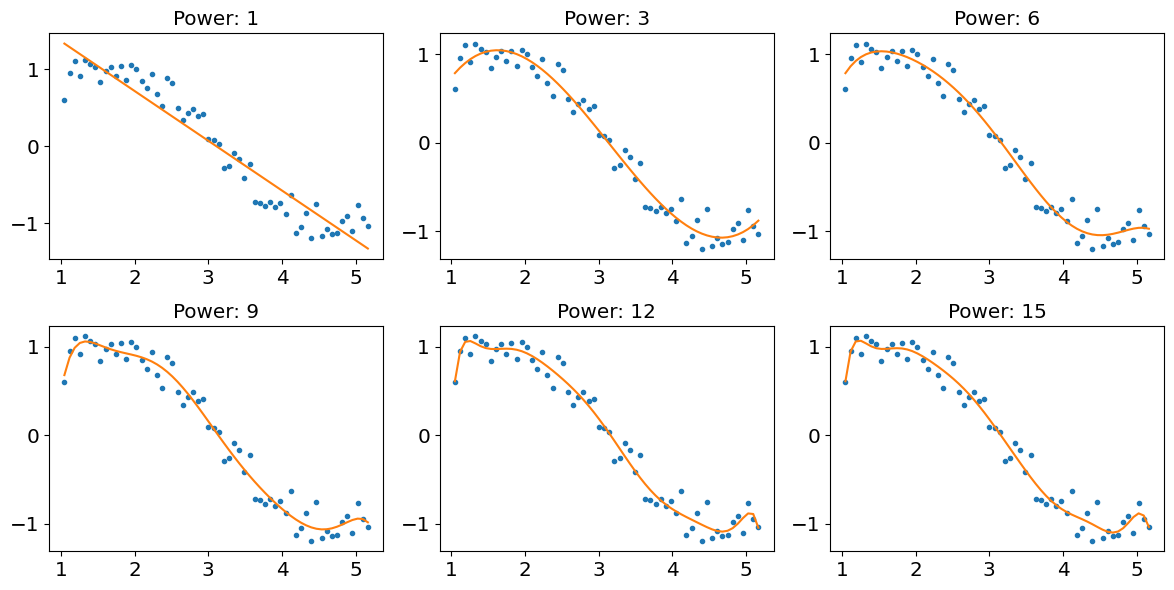

In [11]:
col = ['rss', 'intercept'] + ['coef_x_{}'.format(i) for i in range(1, 16)]
ind = ['degree: {0}'.format(i) for i in range(1, 16)]

perf_Linear = pd.DataFrame(index = ind, columns = col)
plot_dict = {1 : 231, 3 : 232, 6 : 233, 9 : 234, 12 : 235, 15 : 236}

for i in range(1, 16):
    perf_Linear.iloc[i - 1, 0 : i + 2] = example_regression(data, power = i, plot_dict = plot_dict, reg_type = 'Linear')

In [12]:
pd.options.display.float_format = '{:,.2g}'.format
perf_Linear

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
degree: 1,3.7,2,-0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 2,3.7,1.9,-0.54,-0.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 3,1.1,-1.4,3.4,-1.4,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 4,1.1,-1.1,2.9,-1.1,0.087,0.0051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 5,1,0.7,-0.86,1.8,-0.97,0.18,-0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 6,1,-6.1,16,-15,7.4,-2,0.28,-0.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 7,0.98,-19,54,-61,36,-13,2.5,-0.26,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 8,0.94,-66,2.1e+02,-2.9e+02,2.1e+02,-93,26,-4.2,0.39,-0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 9,0.94,-70,2.3e+02,-3.1e+02,2.4e+02,-1.1e+02,31,-5.5,0.57,-0.03,0.00054,NaN,NaN,NaN,NaN,NaN,NaN
degree: 10,0.88,-4.6e+02,1.9e+03,-3.4e+03,3.5e+03,-2.3e+03,9.9e+02,-2.9e+02,57,-7.3,0.53,-0.017,NaN,NaN,NaN,NaN,NaN


### Example 2: Ridge Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.71558e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.5419e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.62918e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.49802e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

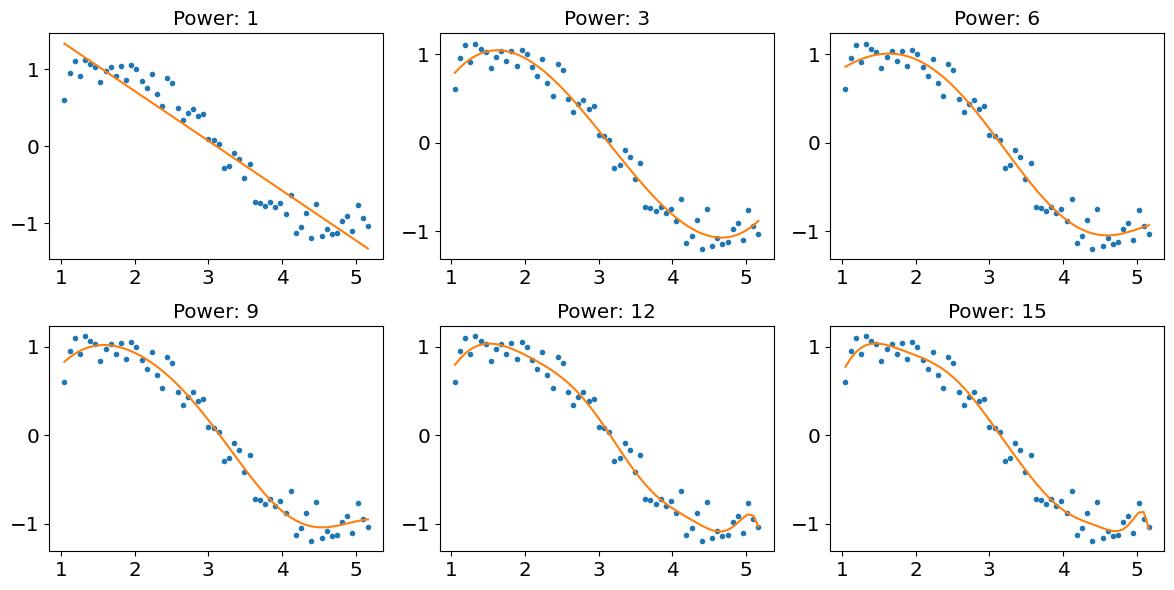

In [13]:
perf_Ridge = pd.DataFrame(index = ind, columns = col)

for i in range(1, 16):
    perf_Ridge.iloc[i - 1,0 : i + 2] = example_regression(data, power = i, plot_dict = plot_dict, reg_type = 'Ridge', alpha = 1e-3)

In [14]:
perf_Ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
degree: 1,3.7,2,-0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 2,3.7,1.9,-0.54,-0.017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 3,1.1,-1.4,3.4,-1.4,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 4,1.1,-0.96,2.7,-1,0.056,0.0075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 5,1,0.27,0.014,1.1,-0.73,0.14,-0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 6,1,0.036,1.1,-0.51,0.32,-0.19,0.043,-0.0031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 7,1,-0.55,1.7,0.16,-0.98,0.58,-0.18,0.027,-0.0017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 8,1,-0.48,1.6,0.18,-0.79,0.39,-0.088,0.0063,0.00091,-0.00013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 9,1,-0.66,1.6,0.47,-0.75,-0.14,0.39,-0.19,0.045,-0.0051,0.00023,NaN,NaN,NaN,NaN,NaN,NaN
degree: 10,1,-1.2,2.4,0.83,-1.4,-0.67,1.6,-1,0.33,-0.06,0.0058,-0.00024,NaN,NaN,NaN,NaN,NaN


### Example 3: LASSO Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.503e-01, tolerance: 4.035e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.705e-01, tolerance: 4.035e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.077e-01, tolerance: 4.035e

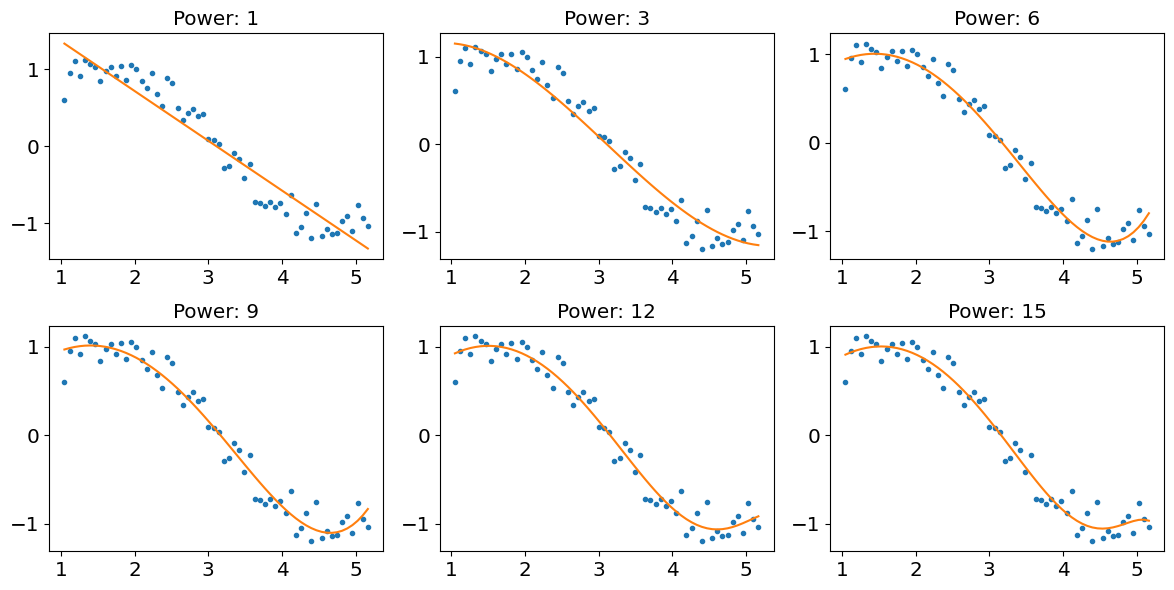

In [15]:
col = ['rss', 'intercept'] + ['coef_x_{}'.format(i) for i in range(1, 16)]
ind = ['degree: {}'.format(i) for i in range(1, 16)]

perf_Lasso = pd.DataFrame(index = ind, columns = col)

plot_dict = {1 : 231, 3 : 232, 6 : 233, 9 : 234, 12 : 235, 15 : 236}

for i in range(1,16):
    perf_Lasso.iloc[i - 1, 0 : i + 2] = example_regression(data, power = i, plot_dict = plot_dict, reg_type = 'Lasso', alpha = 1e-3)

In [16]:
perf_Lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
degree: 1,3.7,2,-0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 2,3.7,1.8,-0.52,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 3,2.1,0.81,0.8,-0.51,0.055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 4,1.2,-0.034,1.5,-0.55,-0.013,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 5,1.1,0.019,1.3,-0.4,-0.027,0.0029,0.0013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 6,1.2,0.25,1,-0.3,-0.025,0.00098,0.00062,0.00012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 7,1.2,0.37,0.88,-0.27,-0.023,0.00082,0.00049,8.5e-05,8.7e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 8,1.2,0.38,0.88,-0.28,-0.023,0.00097,0.00051,8.6e-05,8.4e-06,-2.6e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree: 9,1.2,0.33,0.94,-0.29,-0.024,0.001,0.00055,9.9e-05,1.1e-05,3.3e-07,-2.8e-07,NaN,NaN,NaN,NaN,NaN,NaN
degree: 10,1.1,0.25,1,-0.31,-0.026,0.00089,0.00057,0.00011,1.5e-05,1.1e-06,-1.2e-07,-7.9e-08,NaN,NaN,NaN,NaN,NaN


### Example 4: Logistic Regression

In [ ]:
from sklearn import linear_model, datasets

iris = datasets.load_iris() # https://en.wikipedia.org/wiki/Iris_(plant)
print(iris.DESCR)

In [ ]:
X = iris.data[:, :2]  # We only take the first two features.
y = iris.target

'''please change the value of C to observe the results'''
logreg = linear_model.LogisticRegression(C = 1e5)

result = logreg.fit(X, y)

In [ ]:
%%capture

!pip install mlxtend

from mlxtend.plotting import plot_decision_regions

plt.figure()
plot_decision_regions(X, y, result)
plt.scatter(X[:, 0], X[:, 1], c = y, edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## Support Vector Machine (SVM)
- References
    - https://www.csie.ntu.edu.tw/~cjlin/libsvm/

### Example: Linearly Separable Case

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = '#AAAAAA', alpha = 0.4)

plt.xlim(-1, 3.5);

In [ ]:
from sklearn.svm import SVC  # Support Vector Classifier

clf = SVC(kernel = 'linear')
clf.fit(X, y)

In [ ]:
def plot_svc_decision_function(clf, ax = None):

    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])

    ax.contour(X, Y, P, colors = 'k',
               levels = [-1, 0, 1], alpha = 0.5,
               linestyles = ['--', '-', '--'])

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')
plot_svc_decision_function(clf)

### Example: Nonseparability

In [ ]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor =.1, noise = .1)

clf = SVC(kernel = 'linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')
plot_svc_decision_function(clf);

In [ ]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev = 30, azim = 30):

    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c = y, s = 50, cmap = 'spring')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D()

In [ ]:
clf = SVC(kernel = 'rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s = 200, facecolors = 'none');
plt.axis('equal')

## Decision Tree & Random Forest
- We follow this notebook: https://github.com/twcmchang/hands-on-ML/blob/master/example/05_decision_tree.ipynb
    - A good explanation: https://victorzhou.com/blog/information-gain/
- Glossary
    - Information gain: https://en.wikipedia.org/wiki/Information_gain_in_decision_trees
    - Gini impurity: https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
- Random Forest: https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
- References
    - https://scikit-learn.org/stable/modules/tree.html
    - https://github.com/parrt/dtreeviz/tree/master/notebooks
    - https://github.com/twcmchang/hands-on-ML/blob/master/example/06_gradient_boosting_regression.ipynb
    - <a href = "https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-ensemble-learning%E4%B9%8Bbagging-boosting%E5%92%8Cadaboost-af031229ebc3">機器學習: Ensemble learning之Bagging、Boosting和AdaBoost</a>
    - Importance plot: https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
    - Ensemble learning: https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

## Principal Component Analysis (PCA)
* Illustration for principal component analysis: http://setosa.io/ev/principal-component-analysis/
    * PCA is widely used for dimensionality reduction, as the first step of data analyses.
    * PCA could be done by the singular value decomposition (SVD): https://en.wikipedia.org/wiki/Singular_value_decomposition

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/bb/Singular-Value-Decomposition.svg/440px-Singular-Value-Decomposition.svg.png" width = 400px/img>
</center>

* You could follow this notebook to see how to use the APIs: https://github.com/twcmchang/hands-on-ML/blob/master/example/07_PCA.ipynb

## Clustering: K-Means
- You could follow the notebook: https://github.com/twcmchang/hands-on-ML/blob/master/example/08_kmeans_clustering.ipynb
- References
    - https://github.com/twcmchang/hands-on-ML/blob/master/exercise/ex06_kmeans_clustering_color_compression.ipynb
    - https://www.datacamp.com/community/tutorials/k-means-clustering-python

In [ ]:
!wget https://www.regent-holidays.co.uk/upload-files/product-tours-days/DAY-ITN_TAI_001_4005.jpg

In [ ]:
import matplotlib.image as mpimg

taipei101 = mpimg.imread("./DAY-ITN_TAI_001_4005.jpg")

In [ ]:
from sklearn.cluster import MiniBatchKMeans
# https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html

n_colors = 16
X = (taipei101 / 255.0).reshape(-1, 3)

model = MiniBatchKMeans(n_colors)
model.fit(X)
labels = model.predict(X)

colors = model.cluster_centers_
approx = colors[labels].reshape(taipei101.shape)
approx = (255 * approx).astype(np.uint8)

plt.figure()
plt.imshow(taipei101)
plt.title('input: 16 million colors')

plt.figure()
plt.imshow(approx)
plt.title('{0} colors'.format(n_colors))

## Reinforcement Learning
* Q-Learning: https://en.wikipedia.org/wiki/Q-learning
    * Flappy bird bot using reinforcement learning in python: https://github.com/chncyhn/flappybird-qlearning-bot
![](https://camo.githubusercontent.com/d92b8c5ac27bd63f11909ffa5cf7482e1a714ed6/687474703a2f2f692e696d6775722e636f6d2f30304d663332302e706e67)


## Deep Learning

<center>
<img src = "https://th.bing.com/th/id/OIP.J-UoYRKR7ffsQ_e1ITOFOQHaFP?w=240&h=180&c=7&o=5&dpr=1.75&pid=1.7" width = 300px/img>
</center>

- Wikipedia:
    - https://en.wikipedia.org/wiki/Artificial_neural_network
    - https://en.wikipedia.org/wiki/Deep_learning
- https://www.kaggle.com/learn/intro-to-deep-learning
- References
    - 3Blue1Brown, [Neural networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)
    - 李宏毅，https://www.youtube.com/playlist?list=PLJV_el3uVTsOh1F5eo9txATa4iww0Kp8K
        - https://speech.ee.ntu.edu.tw/~tlkagk/document/Basic.pdf
    - Lee Ming, [由淺入深的深度學習資源整理](https://leemeng.tw/deep-learning-resources.html), 2019